# Utilizing Seaborn for Data Visualization

# Link to matplotlib color maps
#### https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


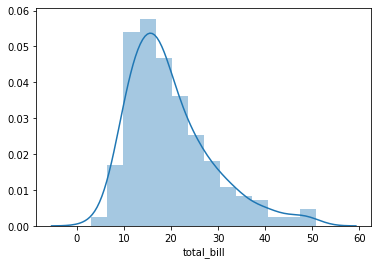

In [5]:
sns.distplot(tips['total_bill'])
# Histogram and KDE 

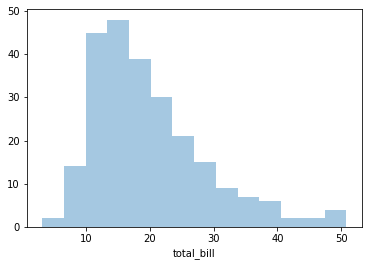

In [6]:
sns.distplot(tips['total_bill'],kde=False)

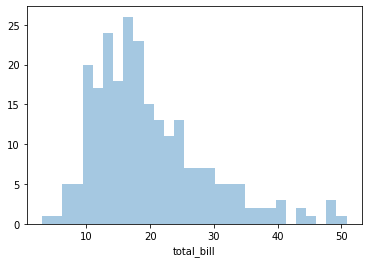

In [7]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

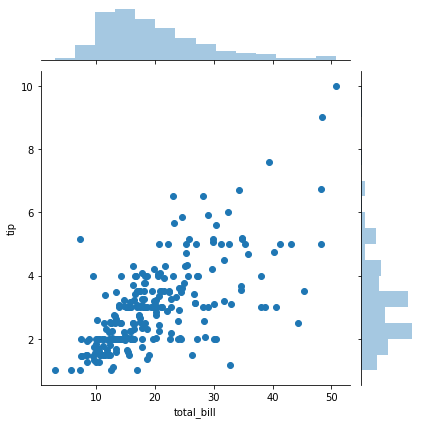

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips)

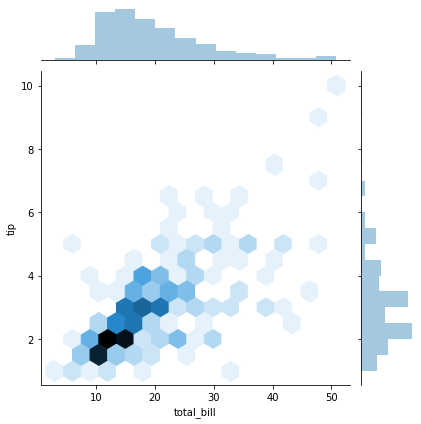

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

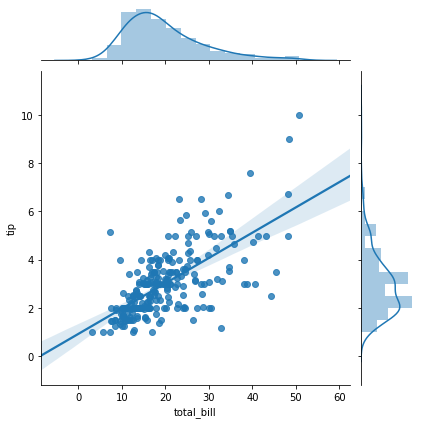

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

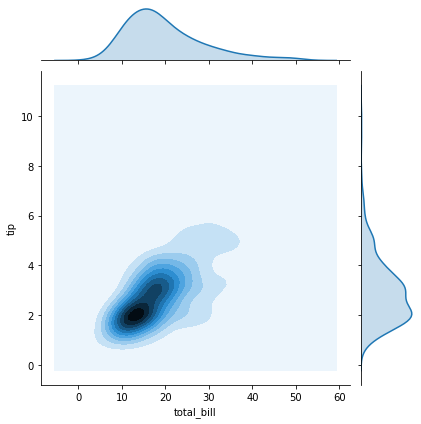

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

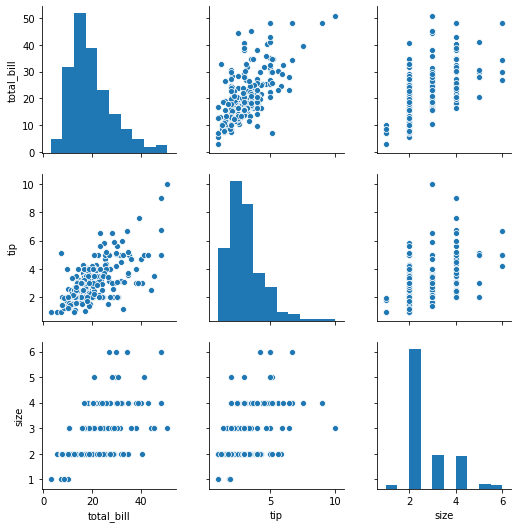

In [12]:
sns.pairplot(tips)
# Performs jointplot() but for every numerical combination

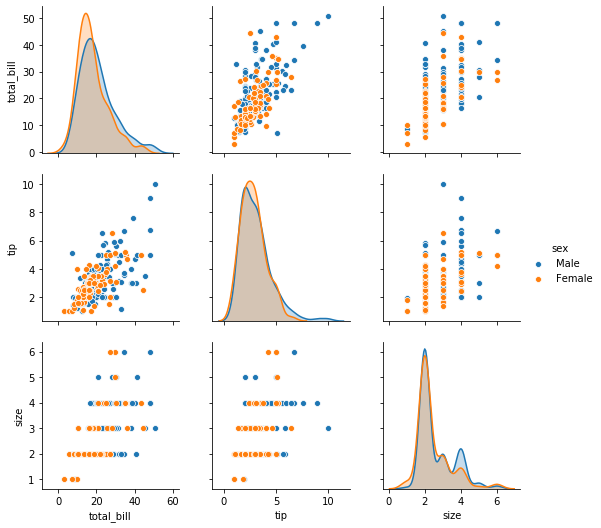

In [13]:
sns.pairplot(tips,hue='sex')
# hue only works with catagorical variables

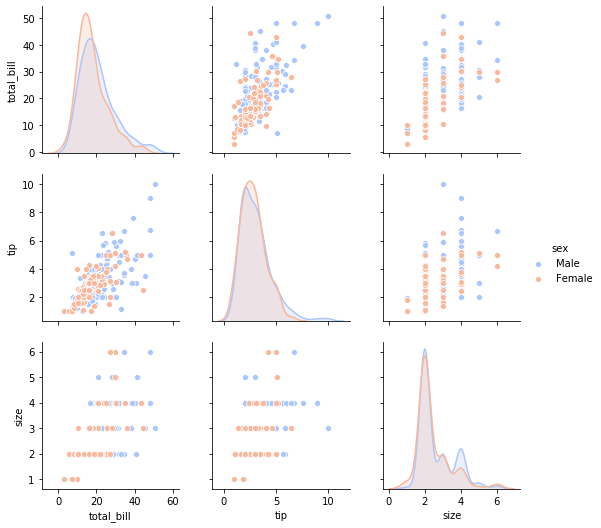

In [14]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
# Palette tosses in a prebuilt color scheme

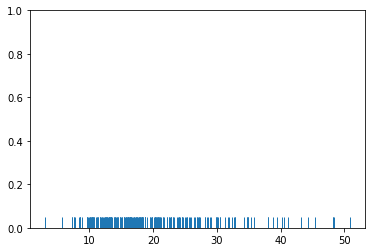

In [15]:
sns. rugplot(tips['total_bill'])
# Draws a dash for every variable, shows the amount of each value

# Understanding KDE
##### Kernal Density Estimation

(0, 1)

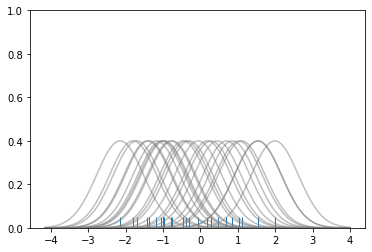

In [17]:
# Jose's Code NOT MINE
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

This graph displays the normal distribution for each point in the rugplot. Now we will sum them to find the KDE.

Text(0.5, 0.98, 'Sum of the Basis Functions')

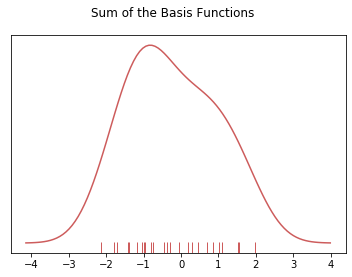

In [18]:
# Jose's Code again


# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

This is the same KDE shown on the dist() function. 

In [19]:
# CATEGORICAL PLOTS

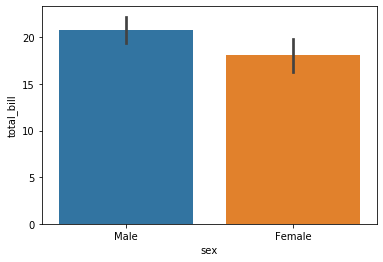

In [20]:
sns.barplot(x='sex',y='total_bill',data=tips)

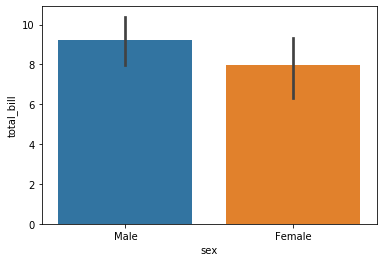

In [21]:
#Altering the aggregate estimator
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

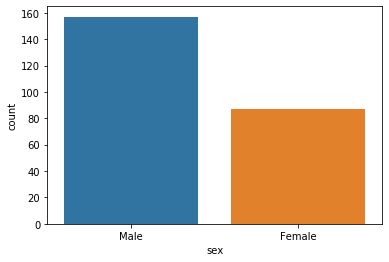

In [22]:
# Same as pd.count()
# Only countin the occurances
sns.countplot(x='sex',data=tips)

# Box and Violin plots

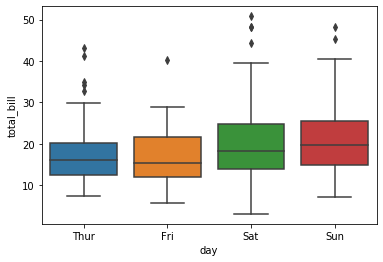

In [23]:
sns.boxplot(x='day',y='total_bill',data=tips)

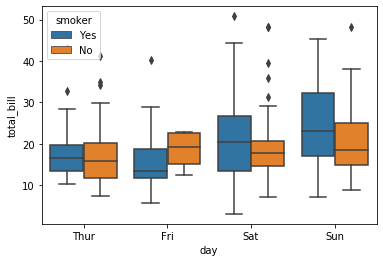

In [24]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

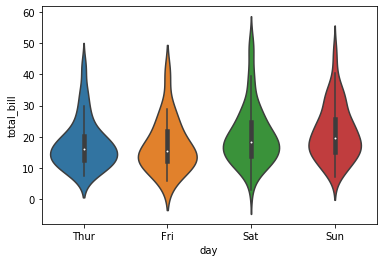

In [25]:
sns.violinplot(x='day',y='total_bill',data=tips)

Basically displays the distribution on its side and contains all points in the distribution. 

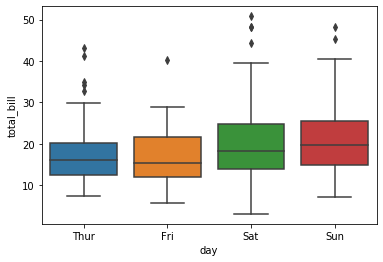

In [26]:
sns.boxplot(x='day',y='total_bill',data=tips)

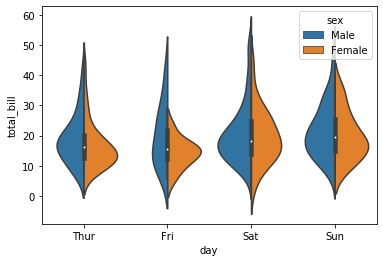

In [27]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

Displays both distributions based on hue category

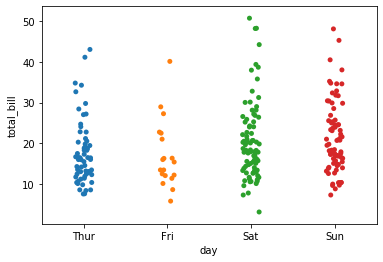

In [28]:
sns.stripplot(x='day',y='total_bill',data=tips)

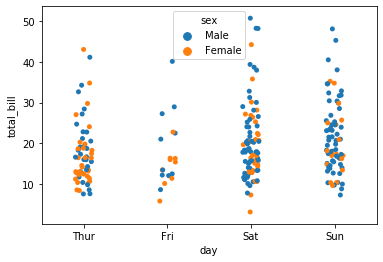

In [29]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex')

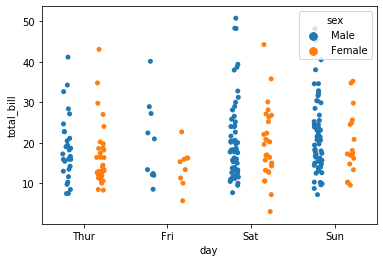

In [30]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True)

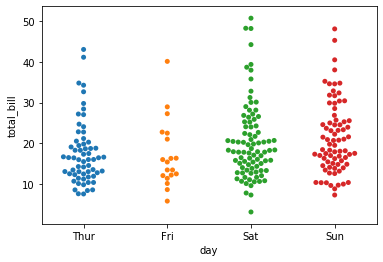

In [31]:
sns.swarmplot(x='day',y='total_bill',data=tips)


Combination of strip plot and a violin plot.
NOTE: Scalling to large numbers is difficult and should be avoided.

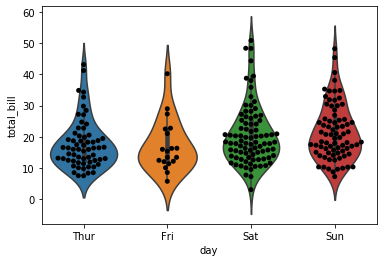

In [32]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

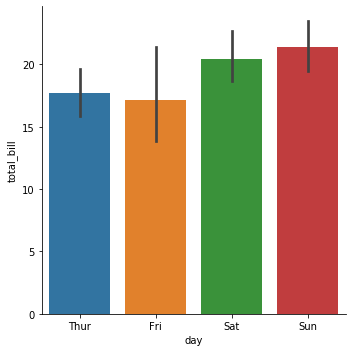

In [33]:
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

# MATRIX PLOTS

In [35]:
flights = sns.load_dataset('flights')

In [36]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


#### THIS IS NOT A MATRIX!!

In [38]:
tc=tips.corr() # This is a matrix

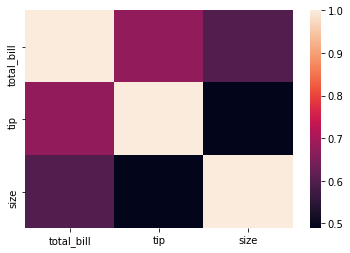

In [39]:
sns.heatmap(tc)

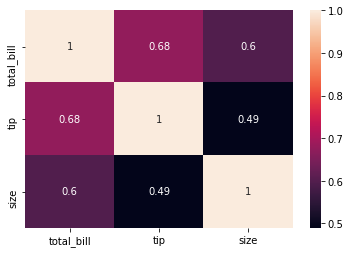

In [40]:
sns.heatmap(tc,annot=True)

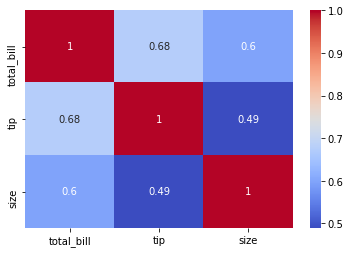

In [41]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [42]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

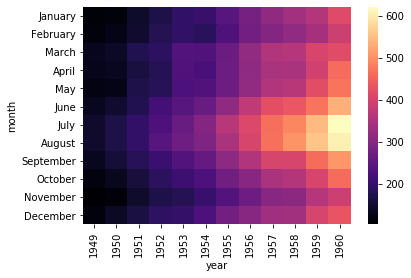

In [43]:
sns.heatmap(fp,cmap='magma')

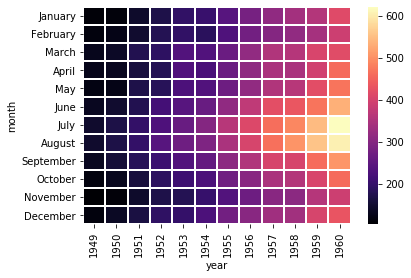

In [44]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=1)

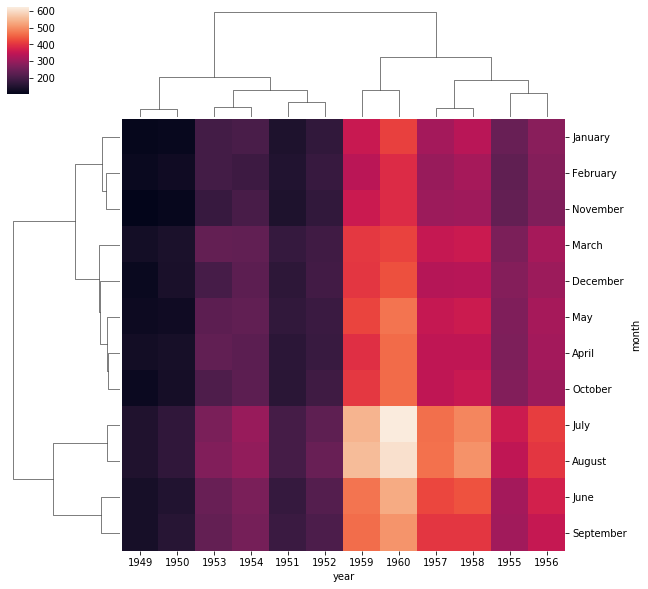

In [45]:
sns.clustermap(fp)

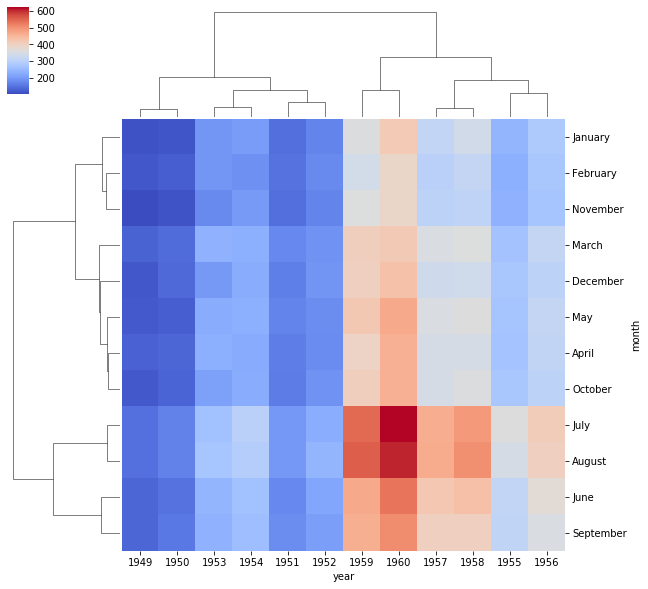

In [46]:
sns.clustermap(fp,cmap='coolwarm')

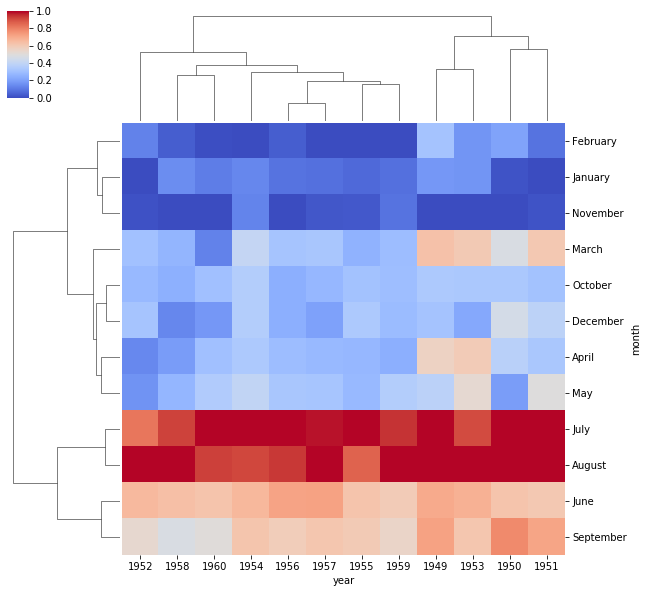

In [47]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

# GRIDS

In [49]:
iris = sns.load_dataset('iris')

In [50]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


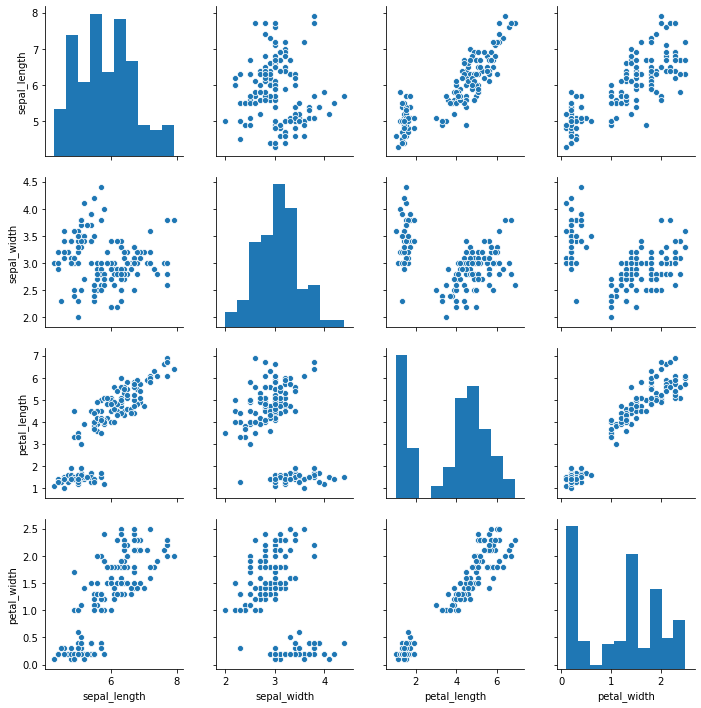

In [51]:
sns.pairplot(iris)

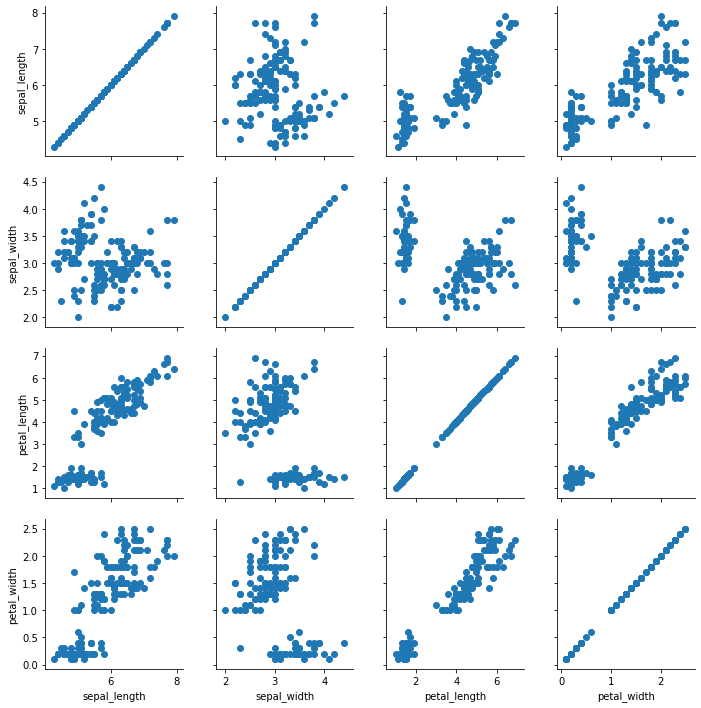

In [54]:
g=sns.PairGrid(iris)
g.map(plt.scatter)

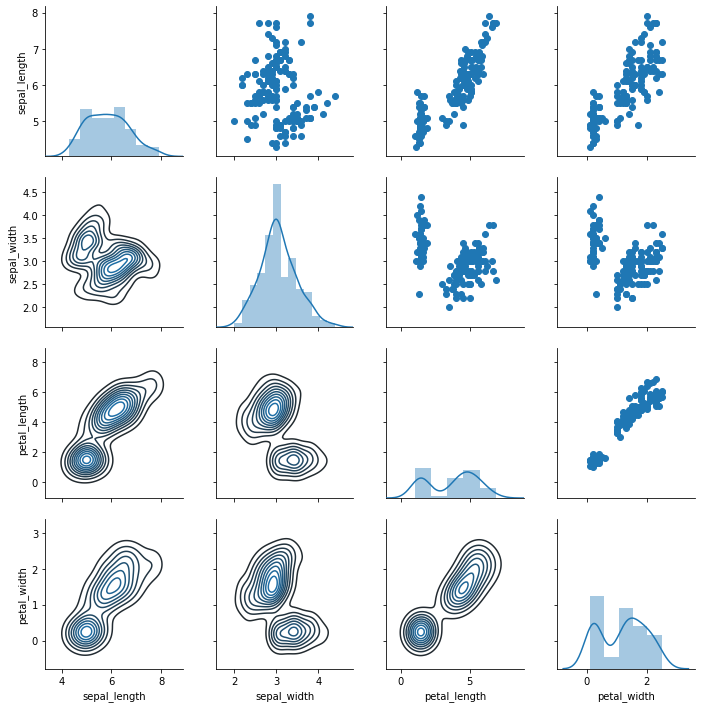

In [56]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

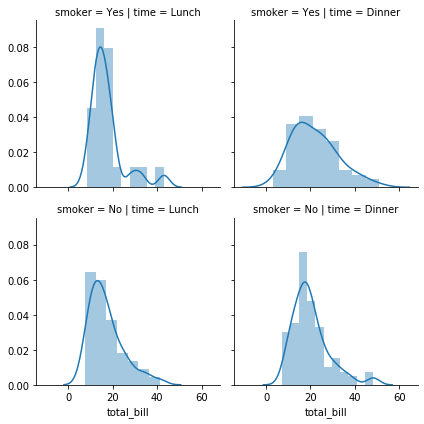

In [58]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

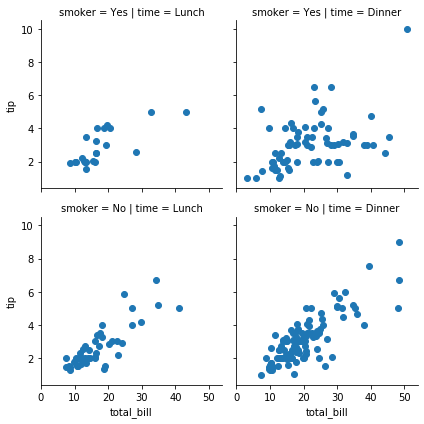

In [62]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

# REGRESSION PLOTS

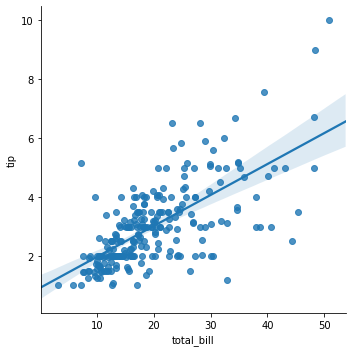

In [67]:
sns.lmplot(x='total_bill',y='tip',data=tips)

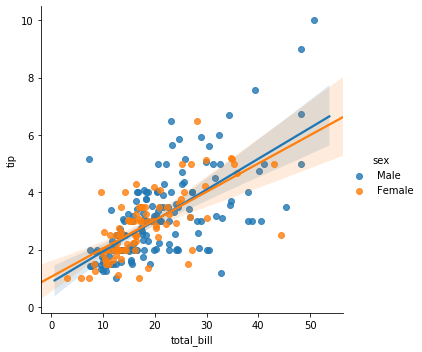

In [68]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

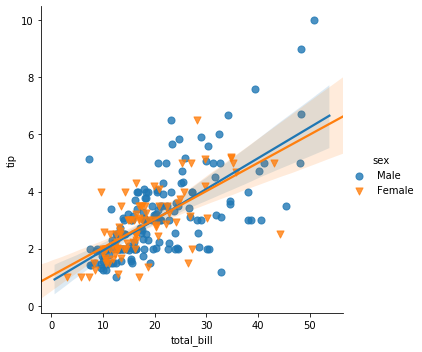

In [73]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',
           markers=['o','v'],scatter_kws={'s':50})

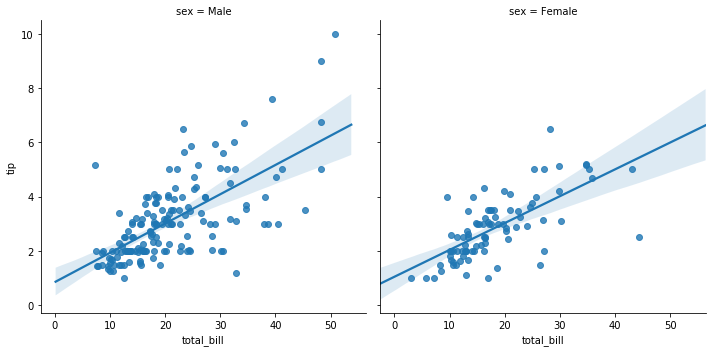

In [75]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

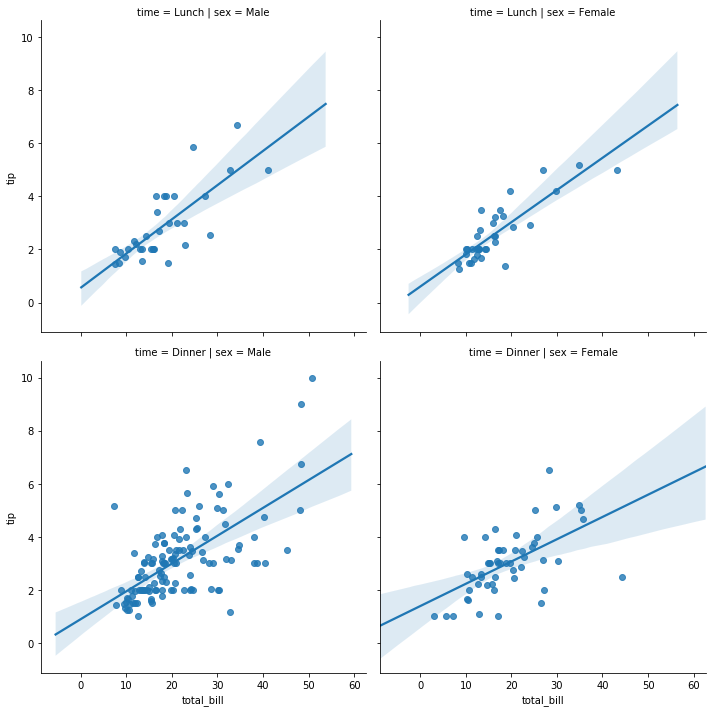

In [76]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

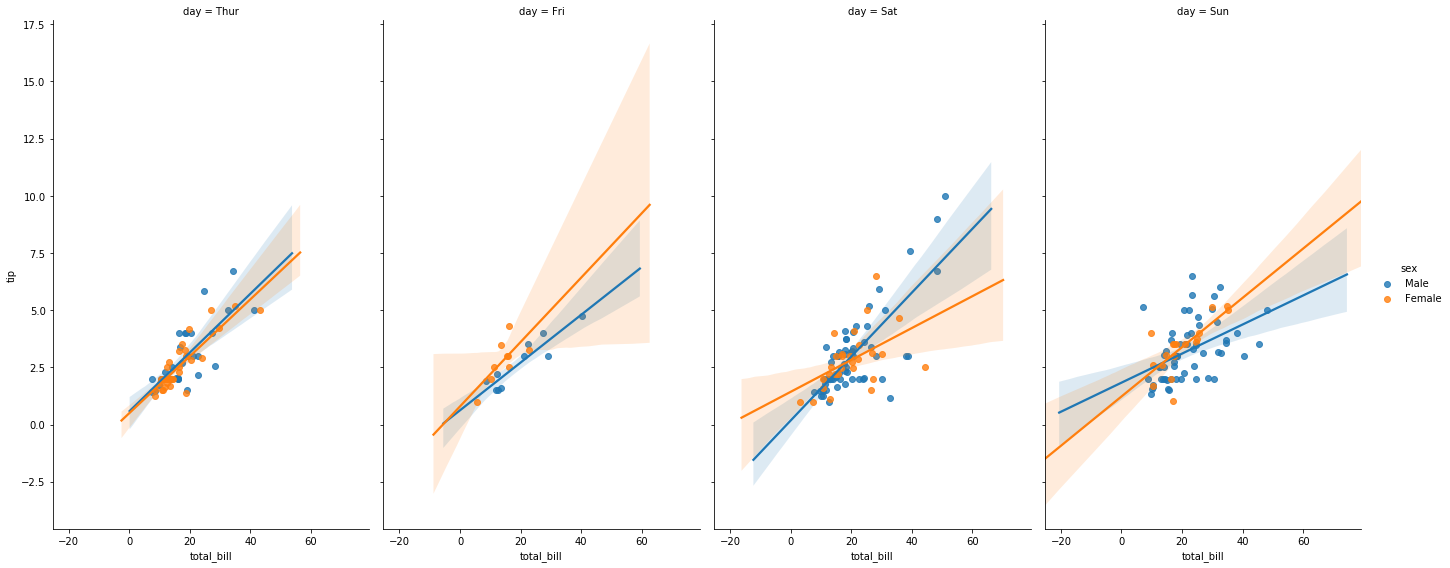

In [81]:
sns.lmplot(x='total_bill',y='tip',
           data=tips,col='day',hue='sex',
          aspect=0.6,height=8)

# Style and Colors in Seaborn

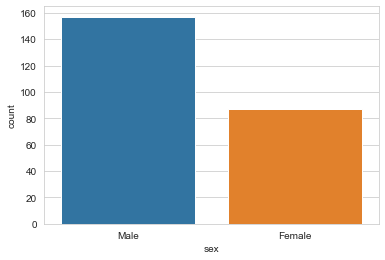

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)


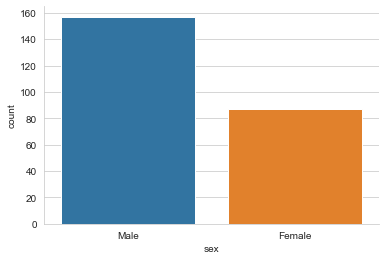

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine()

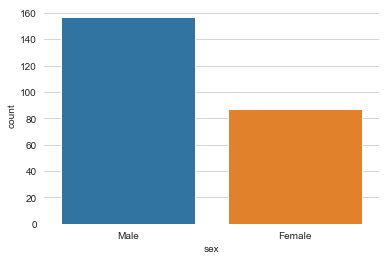

In [90]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

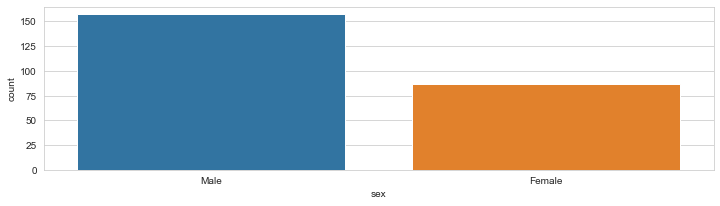

In [93]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

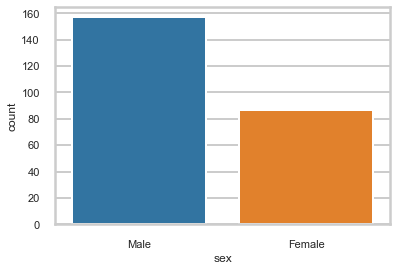

In [96]:
sns.set_context('poster',font_scale=.5)
sns.countplot(x='sex',data=tips)

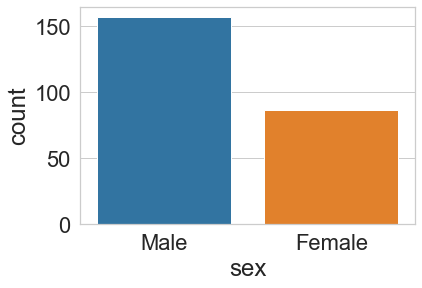

In [97]:
sns.set_context('notebook',font_scale=2)
sns.countplot(x='sex',data=tips)

## Palettes and Colors

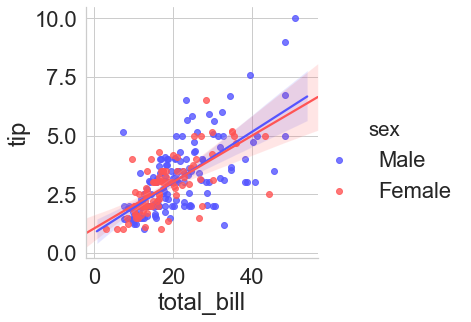

In [99]:
sns.lmplot(x='total_bill',
           y='tip',
           data=tips,
           hue='sex',
           palette='seismic')
# Refer to the top of the file to see source for palette types. 